In [1]:
import pandas as pd
data_xls = pd.read_excel('../data/imf-dm-export-20200516.xls', index_col=0)
data_xls.to_csv('../data/GDP_countries.csv', encoding='utf-8')

In [2]:
df_GDP = pd.read_csv('../data/GDP_countries.csv')
countries = ['Sweden','Denmark', 'Finland', 'Norway', 'Poland', "United Kingdom", "Netherlands", "Switzerland"]
GDP_countries = df_GDP.loc[df_GDP["Real GDP growth (Annual percent change)"].isin(countries),["Real GDP growth (Annual percent change)", "2019", "2020", "2021"]]

In [3]:
convert_dict = {'2019': float, 
                '2020': float, 
                '2021': float
               } 

GDP_countries = GDP_countries.astype(convert_dict)

In [76]:
list(GDP_countries["Real GDP growth (Annual percent change)"])

['Denmark',
 'Finland',
 'Netherlands',
 'Norway',
 'Poland',
 'Sweden',
 'Switzerland',
 'United Kingdom']

In [5]:
import matplotlib.pyplot as plt
import numpy as np

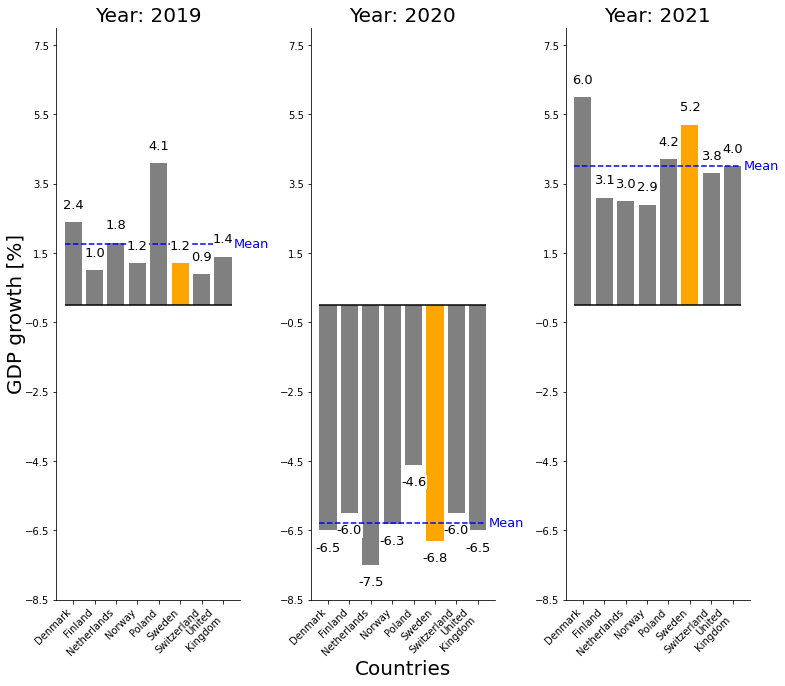

In [85]:
fig = plt.figure(figsize=(11.45,10.43))

fake_ax = fig.add_subplot(111, frameon=False, xticks = [], yticks = [])
fake_ax.set_xlabel("Countries", fontsize = 20, labelpad = 60)
fake_ax.set_ylabel("GDP growth [%]", fontsize = 20, labelpad = 30)

labels = ['Denmark',
 'Finland',
 'Netherlands',
 'Norway',
 'Poland',
 'Sweden',
 'Switzerland',
 'United\n Kingdom']

def create_ax(i, labels):
    ax = fig.add_subplot(1, 3, i + 1)
    ax.set_ylim(-8.5, 8)
    ax.set_yticks([x for x in np.arange(-8.5,8.5,2)])
    ax.set_xticks([country_no for country_no in range(len(GDP_countries["Real GDP growth (Annual percent change)"]))])
    ax.set_xticklabels(labels, 
                       rotation = 45, ha = 'right')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    return(ax)

#labels = [country for country in GDP_countries["Real GDP growth (Annual percent change)"]]

for i in range(3):
    
    mean = np.mean(GDP_countries["{}".format(2019 + i)])
    
    colors = ['orange' if country == 'Sweden' else 'grey' for country in GDP_countries["Real GDP growth (Annual percent change)"]]
    
    year = "Year: {}".format(2019 + i)
    
    ax = create_ax(i, labels)
    bars = ax.bar(GDP_countries["Real GDP growth (Annual percent change)"], 
           GDP_countries["{}".format(2019 + i)], bottom = 0, color = colors)
    ax.set_title(year, fontsize = 20)
    ax.set_facecolor("white")
    ax.set_axisbelow(True)
    
    rects = ax.patches
    bar_labels = GDP_countries["{}".format(2019 + i)]
    
    factor = 1
    
    if i == 1:
        factor = -1
    
    for rect, a, label in zip(rects, bars, bar_labels):
        height = rect.get_height()
        a.axes.text(rect.get_x() + rect.get_width() / 2, 
                    height + factor*0.5 , 
                    label, 
                    ha='center', 
                    va='center', 
                    bbox=dict(facecolor='white', edgecolor= "white",alpha=1, pad = 0.001), 
                    fontsize = 13)
        
    plt.hlines(y = mean, xmin=-0.4, xmax = 7.4, colors = 'blue', linestyles = 'dashed', label = 'Mean')
    plt.text(7.5, mean, 'Mean', va = 'center', fontsize = 13, color = 'blue')
    
    plt.hlines(y = 0, xmin=-0.4, xmax = 7.4, colors = 'black', linestyles = 'solid')
    

fig.tight_layout()

In [86]:
fig.savefig(fname = '../figures_html/GDP.png', dpi= 96, bbox_inches = 'tight', format = 'png')

In [87]:
import matplotlib.pyplot as plt
import base64
from io import BytesIO

tmpfile = BytesIO()
fig.savefig(tmpfile, format='png')
encoded = base64.b64encode(tmpfile.getvalue()).decode('utf-8')

html = '' + '<img src=\'data:image/png;base64,{}\'>'.format(encoded) + ''

with open('../figures_html/GDP.html','w') as f:
    f.write(html)